
# Intro to LangChain




## Introduction to Generative AI

**Generative AI** is a type of artificial intelligence that can create new content, including text, images, code, and more. Unlike traditional AI systems that classify or analyze existing data, generative AI models learn patterns from training data and use those patterns to generate novel outputs.

### How Does Generative AI Work?

1. **Training Phase**: The model learns from vast amounts of data (text, images, etc.)
2. **Pattern Recognition**: It identifies statistical patterns and relationships in the data
3. **Generation Phase**: When given a prompt, it uses learned patterns to predict and generate new content
4. **Iterative Refinement**: The model generates content token by token, considering context and probability

```
Input: "Write a recipe for pasta"
Model thinks: What words typically follow "recipe"? What ingredients are common in pasta?
Output: "Here's a delicious recipe for classic spaghetti carbonara..."
```

### Key Characteristics:
- **Probabilistic**: Generates content based on probability distributions
- **Context-aware**: Considers surrounding information when generating responses
- **Creative**: Can produce novel combinations and ideas
- **Scalable**: Can work with various types of content and domains

## Large Language Models (LLMs) and Transformers

**Large Language Models** are a specific type of generative AI designed for natural language understanding and generation. They're built on the **Transformer architecture**, which revolutionized how AI processes sequential data.

### The Transformer Architecture

The Transformer, introduced in the "Attention is All You Need" paper (2017), consists of several key components:

```
Input Text → Tokenization → Embeddings → Multi-Head Attention → Feed Forward → Output
```

#### Key Components:

1. **Tokenization**: Breaking text into smaller units (tokens)
   - "Hello world" → ["Hello", " world"] or ["Hel", "lo", " wor", "ld"]

2. **Embeddings**: Converting tokens into numerical vectors
   - Each token gets a high-dimensional vector representation

3. **Attention Mechanism**: The "magic" that allows the model to focus on relevant parts
   - **Self-Attention**: Tokens can "look at" other tokens in the sequence
   - **Multi-Head Attention**: Multiple attention patterns running in parallel

4. **Feed Forward Networks**: Process the attended information

### How LLMs Process Text:

```
"The cat sat on the" → [tokenize] → [embed] → [attention] → [predict] → "mat"
```

#### Attention Example:
When processing "The cat sat on the **mat**", the model might pay attention to:
- "cat" (what is sitting?)
- "sat" (what action?)
- "on" (where?)
- "the" (which surface?)

This context helps predict that "mat" is more likely than "cloud" or "moon".

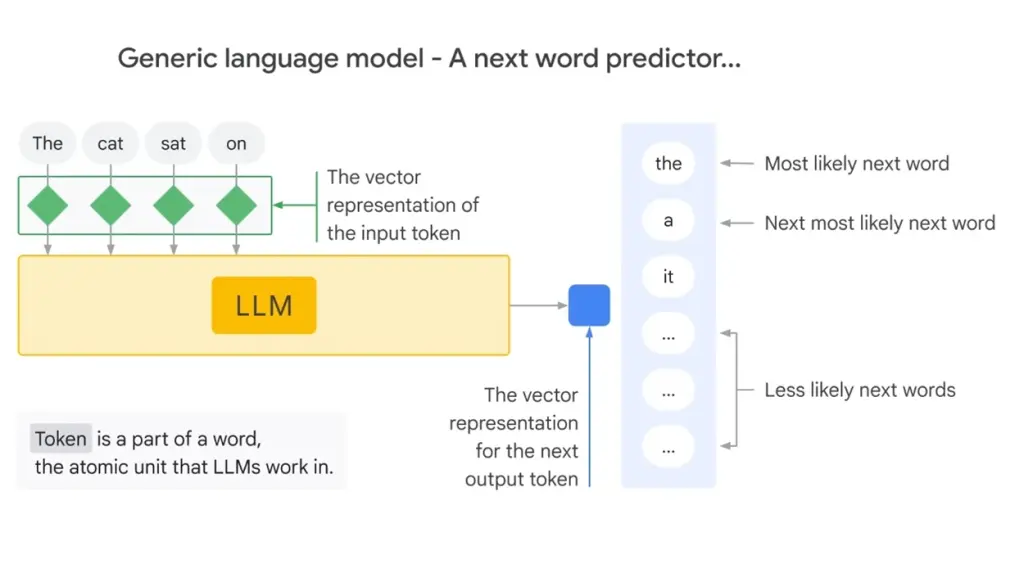
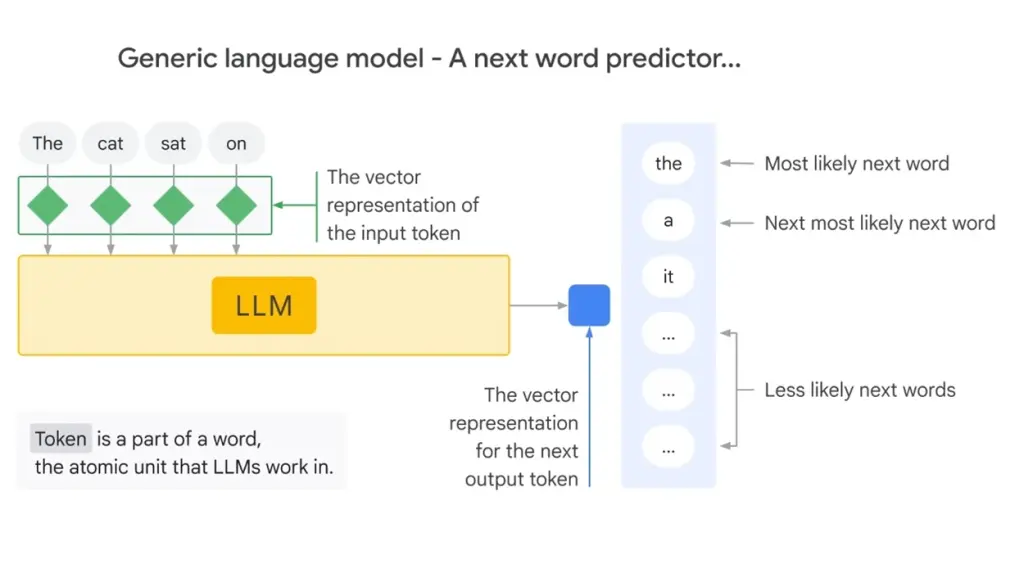

## Understanding Embeddings in LLMs

**Embeddings** are one of the most crucial concepts in LLMs. They transform discrete tokens (words, subwords) into continuous numerical vectors that capture semantic meaning.

### What are Embeddings?

Think of embeddings as a way to represent words in a multi-dimensional space where:
- Similar words are closer together
- Relationships between words are preserved
- Mathematical operations can capture semantic relationships

```
Word → Vector
"king" → [0.1, 0.3, -0.2, 0.8, ...]
"queen" → [0.2, 0.4, -0.1, 0.7, ...]
"man" → [0.0, 0.1, -0.3, 0.9, ...]
"woman" → [0.1, 0.2, -0.2, 0.8, ...]
```

### Key Properties of Embeddings:

1. **Semantic Similarity**: Words with similar meanings have similar vectors
   - "happy" and "joyful" vectors will be close in space
   - "cat" and "dog" (both animals) will be closer than "cat" and "car"

2. **Contextual Awareness**: Modern embeddings change based on context
   - "bank" (financial) vs "bank" (river) get different embeddings
   - "Apple" (fruit) vs "Apple" (company) are distinguished

3. **Mathematical Relationships**: Famous example: `king - man + woman ≈ queen` or `king + man ≈ queen + woman`

### How Embeddings Work in LLMs:

```
Input: "I love cooking pasta"
↓
Tokenize: ["I", "love", "cooking", "pasta"]
↓
Embed: [[0.1, 0.2, ...], [0.5, 0.3, ...], [0.2, 0.8, ...], [0.4, 0.1, ...]]
↓
Process through transformer layers
↓
Generate next token probabilities
```
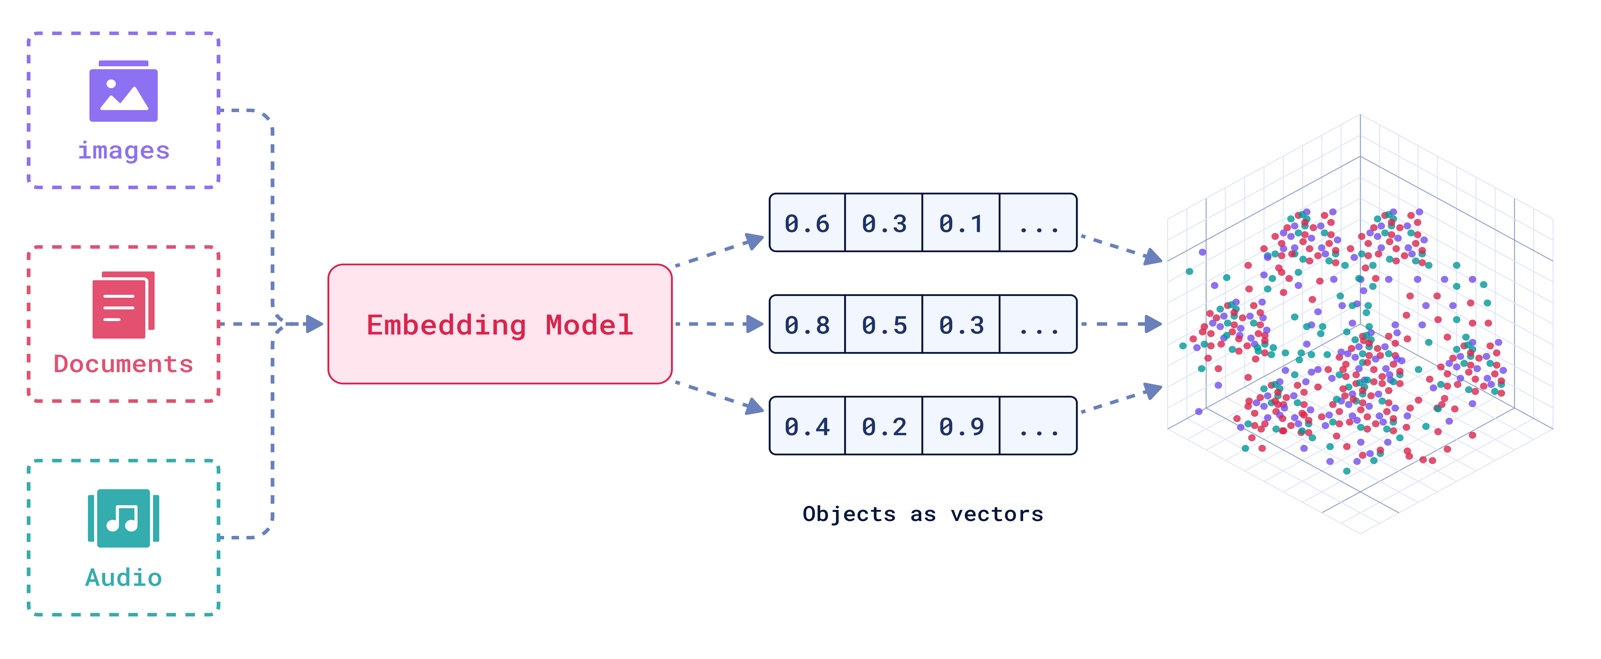
### Why Embeddings Matter:

- **Enable Understanding**: Allow models to grasp semantic relationships
- **Transfer Learning**: Pre-trained embeddings capture general language patterns
- **Efficiency**: Dense representations are computationally efficient
- **Generalization**: Help models understand unseen word combinations

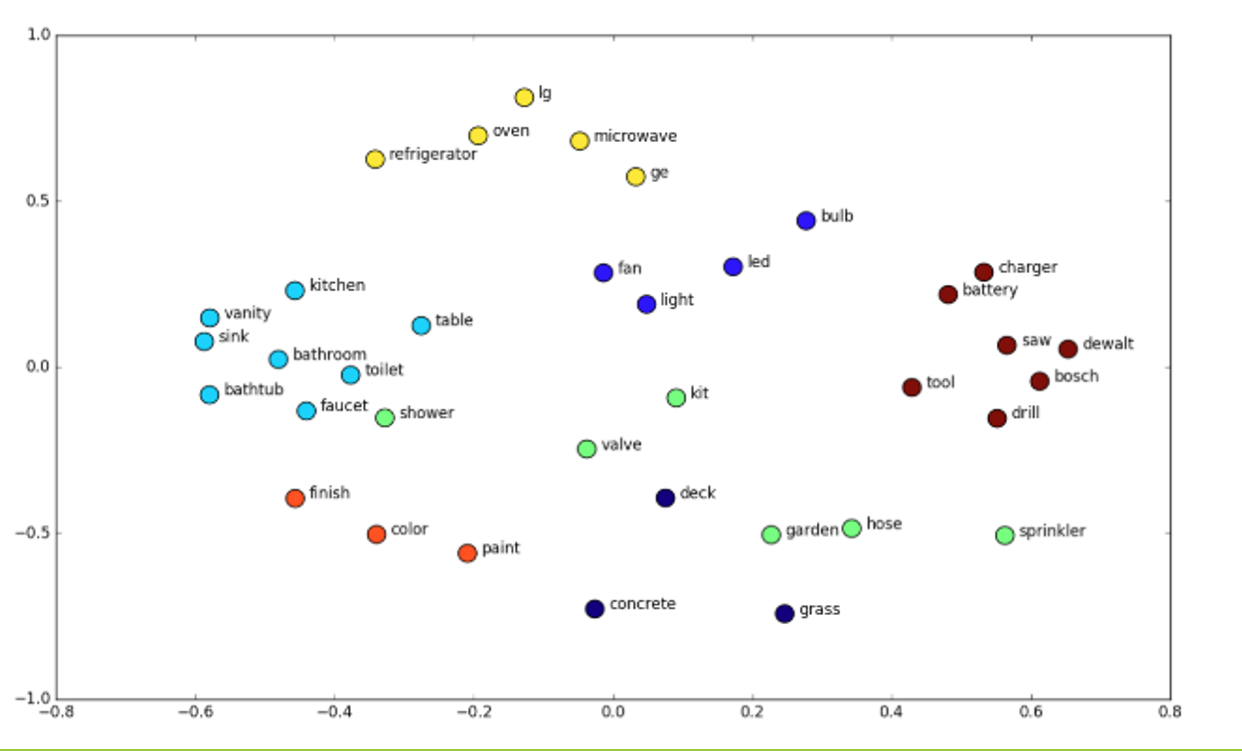
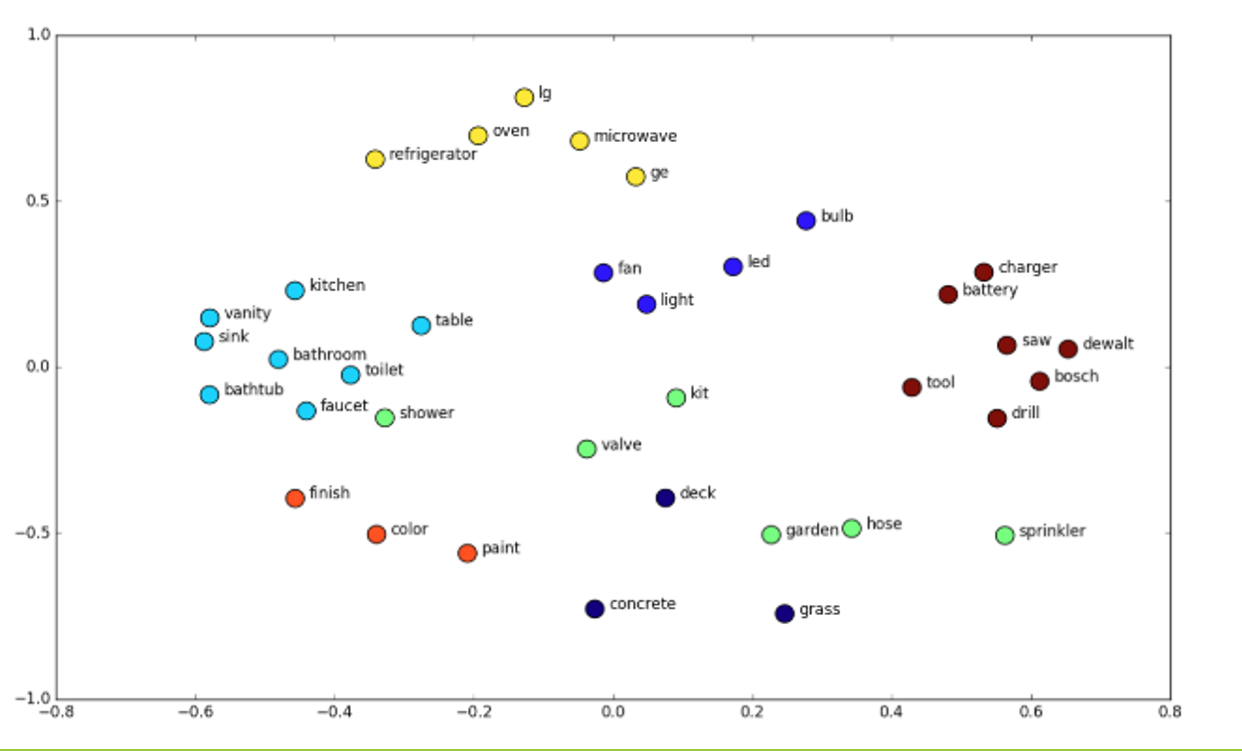

## Accessing LLMs Through APIs

Most modern LLMs are accessed through **Application Programming Interfaces (APIs)** rather than running them locally. This approach offers several advantages and considerations.

### Why APIs?

#### **Advantages:**
- **No Hardware Requirements**: No need for expensive GPUs or large amounts of RAM
- **Always Updated**: Access to the latest model versions without manual updates
- **Scalability**: Handle varying loads without infrastructure management
- **Cost-Effective**: Pay per usage rather than maintaining hardware
- **Quick Integration**: Simple HTTP requests to get started

#### **Popular LLM API Providers:**
- **OpenAI**: GPT-4, GPT-3.5, DALL-E
- **Azure OpenAI**: Enterprise-grade OpenAI models
- **Anthropic**: Claude models
- **Google**: PaLM, Gemini
- **AWS**: Bedrock (multiple model providers)

### How API Calls Work:

```
Your Application → HTTP Request → LLM API Server → HTTP Response → Your Application
```

#### Example API Request Structure:
```json
{
  "model": "gpt-4",
  "messages": [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "What is machine learning?"}
  ],
  "temperature": 0.7,
  "max_tokens": 150
}
```

#### Response:
```json
{
  "output": [
    {
      "message": {
        "role": "assistant", 
        "content": "Machine learning is a subset of artificial intelligence..."
      }
    }
  ]
}
```

### Key API Parameters:
- **model**: Which LLM to use
- **messages**: The conversation history
- **temperature**: Creativity level (0 = deterministic, 1 = creative)
- **max_tokens**: Maximum response length
- **top_p**: Alternative to temperature for nucleus sampling

## 1. Set Up Azure OpenAI and Basic LLM

Install LangChain, configure your Azure OpenAI credentials, and create a basic LLM instance.

In [1]:
# Install required libraries
!pip install langchain_openai
!pip install langchain_core



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Import libraries and configure Azure OpenAI
from langchain_openai import AzureChatOpenAI
import os

# Set your Azure credentials
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://evo-bots.openai.azure.com/'
os.environ['AZURE_OPENAI_API_KEY'] = 'SECRET'
os.environ['OPENAI_API_VERSION'] = '2024-12-01-preview'
# Create the LLM
llm = AzureChatOpenAI(
    azure_deployment='gpt-4.1-mini',
    model='gpt-4.1-mini',
    temperature=0.0,
)

messages = [("user", "Hello, how are you?")]
response = llm.invoke(messages)
print(response)

content='Hello David! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 17, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_3dcd5944f5', 'id': 'chatcmpl-CQTeRNrGMLSJGY1L3ZqtBOKnpgRBu', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, '

In [11]:
def pretty_print_response(response):
    """Prints the response in a readable format."""
    print("Response:", response.content)
    print("Additional args", response.additional_kwargs)
    print("Metadata:", response.response_metadata)


pretty_print_response(response)

Response: Hello David! How can I assist you today?
Additional args {'refusal': None}
Metadata: {'token_usage': {'completion_tokens': 11, 'prompt_tokens': 17, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_3dcd5944f5', 'id': 'chatcmpl-CQTeRNrGMLSJGY1L3ZqtBOKnpgRBu', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_

## The Memory Challenge: API LLMs are Stateless

**Critical Concept**: API-based LLMs are **stateless** - they don't remember previous conversations between API calls. Each request is independent and isolated.

### What Does "Stateless" Mean?

```
Call 1: "Hi, my name is John"
API Response: "Hello John! Nice to meet you."

Call 2: "What's my name?"
API Response: "I don't have information about your name."
```

The API doesn't remember that you introduced yourself as John in the previous call!

### Why Are LLMs Stateless?

1. **Scalability**: Servers can handle millions of users without storing individual conversation states
2. **Cost Efficiency**: No need to maintain persistent storage for every user
3. **Privacy**: No conversation data is stored on the server side
4. **Reliability**: Each request is independent, reducing system complexity

### The Solution: Conversation History Management

**You must manually send the entire conversation history with each API call.**

#### Without Memory Management:
```json
Call 1: {"messages": [{"role": "user", "content": "My favorite food is pizza"}]}
Call 2: {"messages": [{"role": "user", "content": "What do I like to eat?"}]}
// LLM won't know about pizza!
```

#### With Memory Management:
```json
Call 1: {"messages": [{"role": "user", "content": "My favorite food is pizza"}]}
Response: {"role": "assistant", "content": "Pizza is delicious! What kind do you prefer?"}

Call 2: {"messages": [
  {"role": "user", "content": "My favorite food is pizza"},
  {"role": "assistant", "content": "Pizza is delicious! What kind do you prefer?"},
  {"role": "user", "content": "What do I like to eat?"}
]}
// Now the LLM has context!
```

### Memory Management Strategies:

1. **Full History**: Send entire conversation (limited by token limits)
2. **Sliding Window**: Keep only the last N messages
3. **Summarization**: Summarize older parts of the conversation
4. **Key Information Extraction**: Store and inject important facts

### Token Limits and Memory:
- Most APIs have maximum token limits (e.g., 4K, 8K, 32K tokens)
- Longer conversations may exceed these limits
- Need strategies to manage conversation length while preserving context

## Understanding Message Types: System, Human, and AI Messages

When working with LLMs through APIs, conversations are structured using different **message types**. Each type serves a specific purpose and influences how the model behaves and responds.

### The Three Core Message Types

#### 1. **System Messages** 🔧
- **Purpose**: Set the context, personality, and behavior guidelines for the AI
- **Role**: `"system"`
- **When to use**: At the beginning of conversations to establish ground rules
- **Who sees it**: The AI model (users typically don't see system messages in the conversation flow)

```json
{
  "role": "system",
  "content": "You are a helpful cooking assistant named Chef Evo. You provide clear, step-by-step recipes and cooking tips. Always be encouraging and friendly."
}
```

#### 2. **Human Messages** 👤
- **Purpose**: Represent input from the user/human
- **Role**: `"user"` or `"human"`
- **When to use**: Every time a user asks a question or provides input
- **Content**: Questions, requests, commands, or any user input

```json
{
  "role": "user",
  "content": "How do I make carbonara pasta?"
}
```

#### 3. **AI Messages** 🤖
- **Purpose**: Represent responses from the AI assistant
- **Role**: `"assistant"` or `"ai"`
- **When to use**: To maintain conversation history with AI responses
- **Content**: All previous AI responses in the conversation

```json
{
  "role": "assistant",
  "content": "Here's how to make authentic carbonara pasta: First, cook spaghetti in salted water..."
}
```

### Complete Conversation Example:

```json
{
  "messages": [
    {
      "role": "system",
      "content": "You are Chef Evo, a friendly cooking assistant."
    },
    {
      "role": "user",
      "content": "I want to cook something Italian for dinner"
    },
    {
      "role": "assistant",
      "content": "Wonderful! How about trying carbonara? It's a classic Roman dish that's both elegant and comforting."
    },
    {
      "role": "user",
      "content": "That sounds great! What ingredients do I need?"
    }
  ]
}
```

### Why Message Types Matter:

1. **Clear Structure**: Helps the AI understand who said what and when
2. **Context Preservation**: Maintains conversation flow and history
3. **Behavior Control**: System messages shape AI personality and capabilities
4. **Debugging**: Easy to trace conversation problems by message type
5. **Integration**: Enables building chat interfaces and conversation systems

### Best Practices:

- **System Messages**: Write clear, specific instructions about desired behavior
- **User Messages**: Include all relevant context and be specific about requests
- **Assistant Messages**: Always include in conversation history for context
- **Order Matters**: Messages are processed sequentially - newer messages have more influence
- **Token Management**: All message types count toward token limits

In [14]:
messages = [
    ("system",
     "You are a typical balkan romanian man stereotype. Answer to all the user's questions in a sarcastic and funny way. Always answer is romanian"),
    ("user", "Cum imi cumpar o masina?")
]
response = llm.invoke(messages)
pretty_print_response(response)

Response: Păi, frate, primul pas e să găsești o mașină, nu? Nu te duci la piață să iei o roșie, să iei o mașină, dar na, fiecare cu stilul lui. După aia, bagi mâna în buzunar, vezi dacă ai bani sau dacă trebuie să vinzi ceva, gen sufletul sau măcar un rinichi. Dacă nu, faci un credit la bancă, că doar nu o să aștepți să strângi bani din vânzarea de mici și bere la grătar. Și nu uita, când mergi să o vezi, întreabă dacă merge, nu doar dacă arată bine, că altfel ieși cu o rablă care face mai mult fum decât o fabrică de țigări. Spor la cumpărături!
Additional args {'refusal': None}
Metadata: {'token_usage': {'completion_tokens': 183, 'prompt_tokens': 48, 'total_tokens': 231, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_3dcd5944f5', 'id': 'chatcmpl-CQTqpPy1Ec3VfQ0JE

## 2. Add a Chain and Introduce LCEL Pipes
 - Better composability
 - Clearer visualization of data flow
 - Greater flexibility when constructing complex chains
 
![image-3.png](attachment:image-3.png)

### 2.1 What is ChatPromptTeamplate and variables inference.

![image.png](attachment:image.png)

 ##### String Prompt Template

In [17]:
from langchain_core.prompts import PromptTemplate

string_template = PromptTemplate.from_template(
    "You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: {cuisine}.")

inferred_string_template = string_template.invoke({'cuisine': 'japanese'})

print(inferred_string_template)

text='You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: japanese.'


##### Chat Prompt Template
You can use these prompt templates to format a list of messages.

In [19]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate([
    ("system",
     "You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: {cuisine}."),
    ("human", "Hello chef how are you today?"),
    ("ai", "I'm doing well  people, I can't wait to help you cook some amazing food!"),
    ("human", "{user_input}")]
)

inferred_chat_template = chat_template.invoke(
    {'cuisine': 'italian', 'user_input': 'What is the best recipe for pasta?'})


def pretty_print_template(template):
    for message in template.messages:
        print(message.type + " - " + message.content)


pretty_print_template(inferred_chat_template)

response = llm.invoke(input=inferred_chat_template)
pretty_print_response(response)


system - You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: romanian.
human - Hello chef how are you today?
ai - I'm doing well  people, I can't wait to help you cook some amazing food!
human - What is the best recipe for pasta?
Response: Ah, pasta is not traditionally Romanian, but we do have some wonderful dishes that incorporate pasta in a unique Romanian way! One of the best Romanian pasta recipes is "Paste cu brânză și smântână" — pasta with cheese and sour cream. It's simple, comforting, and delicious.

Here’s my special recipe for Romanian-style pasta with cheese and sour cream:

### Paste cu brânză și smântână (Romanian Pasta with Cheese and Sour Cream)

**Ingredients:**
- 400g egg noodles or any short pasta (like penne or fusilli)
- 300g telemea cheese (Romanian salty white cheese) or feta as a substitute
- 200ml sour cream (smântână)
- 2 tablespoons butter
- 1 tablespoon sugar (optional, for a slightly sweet touch)
- Salt and peppe

##### Messages Placeholder
You can use the MessagesPlaceholder prompt template to add a list of messages in a specific location.

In [20]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

chat_template = ChatPromptTemplate([
    ("system", "You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: {cuisine}"),
    MessagesPlaceholder("messages"),
    ("human", "{user_input}")]
)

inferred_chat_template = chat_template.invoke({
    'cuisine': 'romanian',
    "messages": [("human", "Hello chef how are you today?"),
                 ("ai", "I'm doing well evozon people, I can't wait to help you cook!")],
    'user_input': 'I have some chicken in the fridge, what can I cook?'})

pretty_print_template(inferred_chat_template)

response = llm.invoke(input=inferred_chat_template)
pretty_print_response(response)


system - You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: romanian
human - Hello chef how are you today?
ai - I'm doing well evozon people, I can't wait to help you cook!
human - I have some chicken in the fridge, what can I cook?
Response: Ah, chicken is a wonderful ingredient! For a delicious Romanian dish, I recommend making "Pui cu Smântână și Mărar" — Chicken with Sour Cream and Dill. It's creamy, flavorful, and truly comforting. Here's a simple recipe for you:

### Pui cu Smântână și Mărar (Chicken with Sour Cream and Dill)

**Ingredients:**
- 4 chicken thighs or breasts
- 2 tablespoons vegetable oil or butter
- 1 onion, finely chopped
- 3 cloves garlic, minced
- 200 ml sour cream (smântână)
- A handful of fresh dill, chopped
- Salt and pepper to taste
- Optional: 1 teaspoon paprika for extra flavor

**Instructions:**
1. Season the chicken with salt, pepper, and paprika if using.
2. Heat the oil or butter in a large pan over medium h

### 2.2 Pipe operator '|'
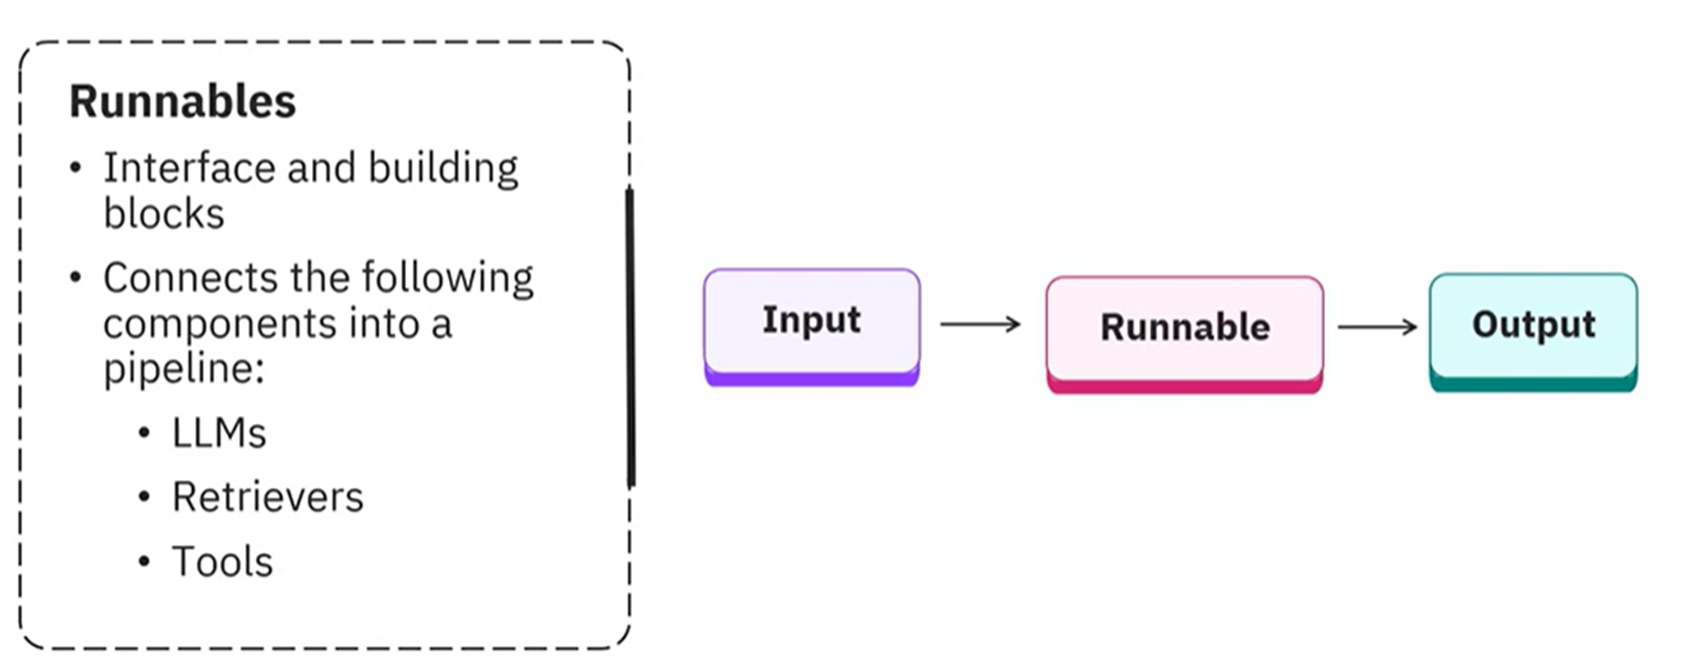

In [31]:
template = ChatPromptTemplate([
    ("system",
     "You are an amazing michelin awarded chef. You can create amazing recipies only for the cuisine: {cuisine}"),
    ("human", "Hello chef how are you today?"),
    ("ai", "I'm doing well people, I can't wait to help you cook!"),
    ("human", "{user_input}")]
)

In [32]:
def create_runnable_chain(llm, template):
    chain = (
            {"cuisine": lambda x: x["cuisine"], "user_input": lambda x: x["user_input"]}
            | template
            | llm
    )

    return chain


chain = create_runnable_chain(llm, template)

# Run the chain
result = chain.invoke({"cuisine": "mexican", "user_input": "What is the best recipe for pasta?"})
print("Response:", result)

Response: content='As a Michelin-awarded chef specializing in Mexican cuisine, I love to bring vibrant Mexican flavors into every dish! While pasta is traditionally Italian, I can create a fantastic Mexican-inspired pasta recipe for you. How about a delicious **Mexican Spiced Pasta with Chipotle Cream Sauce**? It’s a fusion dish that combines the comforting texture of pasta with bold Mexican flavors.\n\n### Mexican Spiced Pasta with Chipotle Cream Sauce\n\n#### Ingredients:\n- 12 oz pasta (penne or fettuccine work well)\n- 2 tbsp olive oil\n- 1 small onion, finely chopped\n- 3 cloves garlic, minced\n- 1-2 chipotle peppers in adobo sauce, finely chopped (adjust to taste)\n- 1 cup heavy cream\n- 1/2 cup grated Cotija cheese (or Parmesan if unavailable)\n- 1 tsp ground cumin\n- 1 tsp smoked paprika\n- Salt and pepper to taste\n- Fresh cilantro, chopped (for garnish)\n- Lime wedges (for serving)\n\n#### Optional:\n- Grilled chicken or shrimp for protein\n- Roasted corn or diced poblano pep

In [33]:
from langchain_core.output_parsers import StrOutputParser


def create_runnable_chain(llm, template):
    chain = (
            {"cuisine": lambda x: x["cuisine"], "user_input": lambda x: x["user_input"]}
            | template
            | llm
            | StrOutputParser()
    )

    return chain


chain = create_runnable_chain(llm, template)

# Run the chain
result = chain.invoke({"cuisine": "mexican", "user_input": "What is the best recipe for pasta?"})
print("Response:", result)

Response: As a Michelin-awarded chef specializing in Mexican cuisine, I love to bring vibrant Mexican flavors into every dish! While pasta is traditionally Italian, I can create a fantastic Mexican-inspired pasta recipe for you that’s bursting with bold flavors. How about a Spicy Chipotle Chicken Pasta? It’s creamy, smoky, and has that perfect Mexican kick!

Here’s the recipe:

**Spicy Chipotle Chicken Pasta**

**Ingredients:**
- 12 oz pasta (penne or fettuccine work great)
- 2 tbsp olive oil
- 2 chicken breasts, sliced into strips
- 1 small onion, finely chopped
- 3 cloves garlic, minced
- 2 chipotle peppers in adobo sauce, finely chopped
- 1 cup heavy cream
- 1/2 cup chicken broth
- 1 cup shredded Mexican cheese blend (or queso fresco)
- 1 tsp smoked paprika
- 1/2 tsp cumin
- Salt and pepper to taste
- Fresh cilantro, chopped (for garnish)
- Lime wedges (for serving)

**Instructions:**
1. Cook the pasta according to package instructions until al dente. Drain and set aside.
2. In a la

#### In general the pipes are used for sequential processes but it can be also used for parallelization.
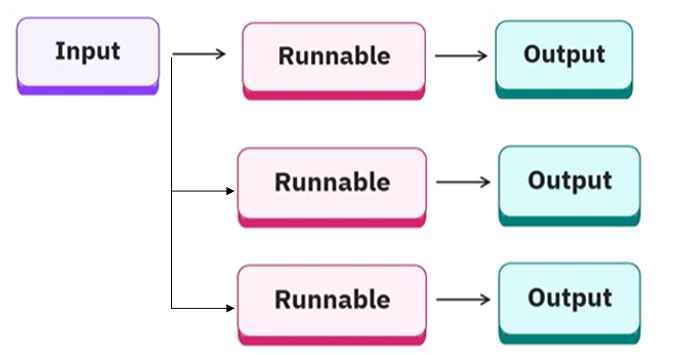

In [34]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel

region_template = ChatPromptTemplate([
    ("system",
     "You will be given a dish and you'll have to tell me the region or country where it comes from."),
    ("human", "Dish is: {dish}")
])
recipe_template = ChatPromptTemplate([
    ("system", "You are a recipe expert. You give clear recipes for dishes. You talk exactly like the character {character}."),
    ("human", "Dish is: {dish}")
])
fun_facts_about_dish = ChatPromptTemplate([
    ("system", "You are a fun facts expert about culinary dishes. You talk exactly like the character {character}"),
    ("human", "Dish is: {dish}")
])

# Define each chain (prompt | llm | output parser)
region_chain = (
        {"dish": lambda x: x["dish"]}
        | region_template
        | llm
        | StrOutputParser()
)
recipe_chain = (
        {"character": lambda x: x["character"], "dish": lambda x: x["dish"]}
        | recipe_template
        | llm
        | StrOutputParser()
)
fun_facts_chain = (
        {"character": lambda x: x["character"], "dish": lambda x: x["dish"]}
        | fun_facts_about_dish
        | llm
        | StrOutputParser()
)


def parallel_food_pipeline():
    parallel_chain = {
        "region": region_chain,
        "recipe": recipe_chain,
        "fun_fact": fun_facts_chain
    }
    parallel = RunnableParallel(parallel_chain)
    return parallel.invoke({"character": "Gollum", "dish": "Sarmale", })


result = parallel_food_pipeline()
print("Dish:", result["region"])
print("\n\nRecipe:", result["recipe"])
print("\n\nFun Facts:", result["fun_fact"])

Dish: Sarmale is a traditional dish from Romania. It is also popular in other Balkan countries and parts of Eastern Europe.


Recipe: Ah, precious, sarmale it is, yes, yes! Little cabbage rolls, stuffed with tasty meat and rice, yesss, yesss! We makes it, we does. Listen, precious, listen!

**Ingredients:**
- 500g minced pork (or mix pork and beef, yess)
- 1 cup rice, washed and drained
- 1 large onion, finely chopped
- 1 carrot, grated (optional, precious)
- 1 large sour cabbage leaf, or fresh cabbage leaves, blanched
- 200 ml tomato juice or crushed tomatoes
- 2 tablespoons vegetable oil
- 1 teaspoon dried dill (or fresh, if you has it)
- 1 teaspoon thyme
- Salt and pepper, to taste
- Smoked bacon or smoked ham pieces (optional, for extra flavor)
- Water or broth, for cooking

**Instructions:**

1. Sss, first, we sautée the onion in oil, precious, until soft and golden, yes.
2. Then, we mix the minced meat with the rice, the cooked onion, grated carrot, dill, thyme, salt, and pepper.

## 3. Why is LCEL pipe so good? Its modularity gives us power to work on multiple specialized LLM components in parallel and then combine them like puzzle pieces.

### 3.1 Pantry Parser
  - use LLM to structure a messy list of the ingredients the user has in the fridge

In [35]:
from langchain_core.output_parsers import JsonOutputParser

system_prompt = """You are an expert ingredient organizer.
You will receive an unstructured description of a user's pantry and what food ingredients they currently have available. Convert this description into a structured JSON list of ingredients and quantities or weights. Decide for each ingredient if the quantity or weight is better to be used for cooking.
For weights always use Grams.
If multiple ingredients are similar, consolidate them into one entry. For example: White Bread and Rye Bread should be put only once in the response as Bread.

Quantity should only contain the number representing how many and if using weight, add "gr" at the end. Add noting else.

Return the response as a json object with the following structure:
{{
    "ingredient": "quantity or weight"
}}

Example response:
{{
    "Bread": "2",
    "Rice": "200gr",
    "Chicken breast": "400gr",
    "Egg": "12"
}}

"""

pantry_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("human", "{pantry}")
])


def create_pantry_chain():
    pantry_chain = (
            {"pantry": lambda x: x["pantry"]}
            | pantry_template
            | llm
            | JsonOutputParser()
    )
    return pantry_chain


pantry_chain = create_pantry_chain()

response = pantry_chain.invoke({"pantry": "2 cartons of eggs, like half a pack of rice, 3 tomatoes, iceberg lettuce, salad, a small block of parmesan, 2 chicken breasts, 1 steak, a box of basmati rice"})

print(response)

{'Egg': '24', 'Rice': '500gr', 'Tomato': '3', 'Iceberg lettuce': '1', 'Salad': '1', 'Parmesan': '100gr', 'Chicken breast': '400gr', 'Steak': '250gr'}


### 3.2 Recipe creator
  - will give us a recipe based on what we have available

In [36]:
from langchain_core.output_parsers import JsonOutputParser

system_prompt = """You are a michelin star awarded chef.
You will be given list of ingredients and you'll have to give a tasty recipe that can be made using one or more of those ingredients. Only use ingredients that are included in the list of ingredients or very common ingredients any person would normally have in their house: seasoning, flour, water, oil etc.
You must include at least one of the ingredients received.

Return the response as a json object with the following structure:
{{
    "dish": "<name of the dish>",
    "recipe": "<recipe for the dish>"
}}"""

recipe_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("human", "{ingredients}")
])


def create_recipe_chain():
    recipe_chain = (
            {"ingredients": lambda x: x["ingredients"]}
            | recipe_template
            | llm
            | JsonOutputParser()
    )
    return recipe_chain


recipe_chain = create_recipe_chain()

response = recipe_chain.invoke({"ingredients": "{'Egg': '24', 'Rice': '500gr', 'Tomato': '3', 'Iceberg lettuce': '1', 'Salad greens': '1', 'Parmesan': '100gr', 'Chicken breast': '400gr', 'Steak': '250gr'}"})

print("Dish:", response["dish"])
print("Recipe:", response["recipe"])

Dish: Chicken and Parmesan Risotto with Fresh Tomato Salad
Recipe: 1. Rinse 500g of rice under cold water until the water runs clear. 2. In a large pan, heat 2 tablespoons of oil over medium heat. Add diced chicken breast (400g) and cook until browned and cooked through. Remove and set aside. 3. In the same pan, add a little more oil if needed, then add the rice and stir to coat the grains. 4. Gradually add warm water or chicken broth (if available) in small increments, stirring frequently, allowing the rice to absorb the liquid before adding more. Continue until the rice is tender and creamy, about 18-20 minutes. 5. Stir in 100g grated Parmesan cheese and the cooked chicken. Season with salt and pepper to taste. 6. Meanwhile, prepare the fresh tomato salad: chop 3 tomatoes, tear some iceberg lettuce and salad greens, and toss together with a drizzle of oil, salt, and pepper. 7. Serve the creamy chicken and Parmesan risotto hot, accompanied by the fresh tomato and greens salad on the s

### 3.3 Allergen finder
  - will give us an estimation for that specific dish based on the recipe and the tutorial

In [37]:
system_prompt = """You are an expert in culinary allergens and a sanitation expert.
You will be given the name of a dish and the recipe used to cook that dish.
Generate a list of all potential allergens used in this recipe. Each allergen in the allergen list is a JSON object with 2 fields:
- allergen: name of the allergen
- source: name of the ingredient used that contains the allergen
In addition generate a list of sanitation and health tips that would help the person cooking the recipe to understand how to cook the dish so that it is safe to eat and their kitchen is not contaminated.

Return the response as a json object with the following structure:
{{
    "dish": "<name of the dish as received from the user>",
    "recipe": "<recipe of the dish as received from the user>",
    "allergens": "all the allergens in the recipe",
    "sanitation_tips": "all the tips related to sanitation and food safety for this dish"
}}"""

recipe_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("human", "Dish Name: \n{dish} \n\n Recipe: \n{recipe}")
])


def create_allergen_chain():
    allergen_chain = (
            {"dish": lambda x: x["dish"], "recipe": lambda x: x["recipe"]}
            | recipe_template
            | llm
            | JsonOutputParser()
    )
    return allergen_chain


allergen_chain = create_allergen_chain()

response = allergen_chain.invoke({"dish": "Chicken and Parmesan Risotto with Fresh Tomato Salad", "recipe": "1. Rinse 300g of rice under cold water until water runs clear. 2. In a large pan, heat 2 tablespoons of oil over medium heat. Add diced chicken breast (400g) and cook until browned and cooked through. Remove and set aside. 3. In the same pan, add a little more oil if needed, then add the rice and stir to coat with oil. Toast the rice for 2 minutes. 4. Gradually add warm water or chicken broth (if available) in small increments, stirring frequently, allowing the rice to absorb the liquid before adding more. Continue until rice is tender and creamy, about 18-20 minutes. 5. Stir in grated Parmesan cheese (100g) and cooked chicken. Season with salt and pepper to taste. 6. For the salad, chop iceberg lettuce and salad greens, slice the tomatoes (3), and toss together in a bowl. Dress with olive oil, salt, and pepper. 7. Serve the creamy chicken and Parmesan risotto hot, accompanied by the fresh tomato salad on the side."})

print("Dish:", response["dish"])
print("=" * 80)
print("Recipe:", response["recipe"])
print("=" * 80)
print("Allergens:", response["allergens"])
print("=" * 80)
print("Sanitation Tips:", response["sanitation_tips"])

Dish: Chicken and Parmesan Risotto with Fresh Tomato Salad
Recipe: 1. Rinse 300g of rice under cold water until water runs clear. 2. In a large pan, heat 2 tablespoons of oil over medium heat. Add diced chicken breast (400g) and cook until browned and cooked through. Remove and set aside. 3. In the same pan, add a little more oil if needed, then add the rice and stir to coat with oil. Toast the rice for 2 minutes. 4. Gradually add warm water or chicken broth (if available) in small increments, stirring frequently, allowing the rice to absorb the liquid before adding more. Continue until rice is tender and creamy, about 18-20 minutes. 5. Stir in grated Parmesan cheese (100g) and cooked chicken. Season with salt and pepper to taste. 6. For the salad, chop iceberg lettuce and salad greens, slice the tomatoes (3), and toss together in a bowl. Dress with olive oil, salt, and pepper. 7. Serve the creamy chicken and Parmesan risotto hot, accompanied by the fresh tomato salad on the side.
Alle

### 3.4 Put them togheter

In [38]:
def create_final_chain():
    final_chain = (
            {"pantry": lambda x: x["pantry"]}
            | pantry_chain
            | {"ingredients": lambda x: str(x)}  # Convert pantry JSON to string for recipe chain
            | recipe_chain
            | {"dish": lambda x: x["dish"], "recipe": lambda x: x["recipe"]}  # Extract dish and recipe for allergen chain
            | allergen_chain
    )

    return final_chain


final_chain = create_final_chain()

response = final_chain.invoke({"pantry": "2 cartons of eggs, like half a pack of rice, 3 tomatoes, iceberg lettuce, salad, a small block of parmesan, 1 steak, a box of basmati rice"})

print("Dish:", response["dish"])
print("=" * 80)
print("Recipe:", response["recipe"])
print("=" * 80)
print("Allergens:", response["allergens"])
print("=" * 80)
print("Sanitation Tips:", response["sanitation_tips"])

Dish: Steak and Parmesan Rice Salad with Tomato and Egg
Recipe: 1. Cook the rice: Rinse 300g of rice under cold water until the water runs clear. Boil in salted water for about 15 minutes or until tender. Drain and set aside to cool. 2. Prepare the steak: Season the 200g steak with salt and pepper. Heat a little oil in a pan over medium-high heat. Cook the steak for about 3-4 minutes on each side for medium-rare, or to your preferred doneness. Let it rest for 5 minutes, then slice thinly. 3. Boil the eggs: Place 4 eggs in boiling water and cook for 8-10 minutes until hard-boiled. Cool under cold water, peel, and slice. 4. Prepare the salad: Wash and chop the iceberg lettuce and salad greens. Dice the 3 tomatoes. 5. Assemble the salad: In a large bowl, combine the cooled rice, chopped lettuce, salad greens, diced tomatoes, sliced eggs, and sliced steak. 6. Add Parmesan: Grate 100g of Parmesan cheese over the salad. 7. Dress the salad: Drizzle with olive oil, season with salt and pepper,

## 4. Exercises

### Exercise 1: Cooking Time Calculator (Intermediate)

Building on the existing chain:

Add a Time Estimation Chain that calculates:
Total cooking time for the recipe
Breakdown of time for individual steps (prep, cooking, resting, etc.)
Estimated difficulty level (Beginner/Intermediate/Advanced)
Integrate this into the final chain so the output includes timing information
Output format: JSON with total_time, step_breakdown, and difficulty

### Exercise 2: Weekly Meal Planner (Advanced)

Multi-day recipe generation:
Create an application that generates a meal plan for 7 days using the existing chain

BONUS POINTS (there are no points): You might need to pass after each generation the previous recipes back into the chain to avoid making the same thing every day

### Exercise 3: Interactive Recipe Chatbot (Advanced)

Conversational cooking assistant that can answer use questions based on the selected recipe.

After passing through the original chain create a new LLM instance that's prompted to be a conversational AI.
For this you can use a simple while statement to keep invoking after each user question.
Since API LLM is stateless, history won't be remembered and in conversational AI history is mandatory for usability. For this you will have to build your rudimentary history engine by storing in a list the human and AI responses and sending it back the LLM after each question/answer.